In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from skimage.external import tifffile
from skimage.external.tifffile import imread

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200207_new data'

In [3]:
file=f'{bigDir}\cellinfo_200203_v6.csv'

In [4]:
data=pd.read_csv(file)

# data visualizations 

In [5]:
data=data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [6]:
data.head()

,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,physical_age,mol_age_mod
0,20200203_cell_00.ciz,20200203-06-13-63X 16bit,20200203 simcmxy06,647.518,153.039,MCM3,1.0,HP1beta,2.0,3.0,...,1781811545,942249454,553948216,388301238,1841375979,447865672,1393510307,d20200203,2.333333,0.225
1,20200203_cell_01.ciz,20200203-06-25-63X 16bit,20200203 simcmxy06,1490.165,332.591,MCM3,1.0,HP1beta,2.0,3.0,...,1768827952,733928606,333304109,400624497,1888008341,519804886,1368203455,d20200203,1.333333,0.166
2,20200203_cell_02.ciz,20200203-06-27-63X 16bit,20200203 simcmxy06,1560.535,380.034,MCM3,1.0,HP1beta,2.0,3.0,...,1844852860,744758812,334218140,410540672,1937366665,503054477,1434312188,d20200203,1.333333,0.166
3,20200203_cell_03.ciz,20200203-06-29-63X 16bit,20200203 simcmxy06,930.763,391.252,MCM3,1.0,HP1beta,2.0,3.0,...,2026255216,1034361320,571961971,462399349,1946238103,382382236,1563855867,d20200203,6.833333,0.684
4,20200203_cell_04.ciz,20200203-06-51-63X 16bit,20200203 simcmxy06,1653.035,635.701,MCM3,1.0,HP1beta,2.0,3.0,...,2058830570,1055250742,627925856,427324886,2059952844,428447160,1631505684,d20200203,4.166667,0.376


In [7]:
Luc=data.loc[(data.group=='siLuc'),:].copy()

In [8]:
MCM3=data.loc[(data.group=='siMCM3'),:].copy()

# violin plot of 'group vs nuc_mcm_total'

<IPython.core.display.Javascript object>


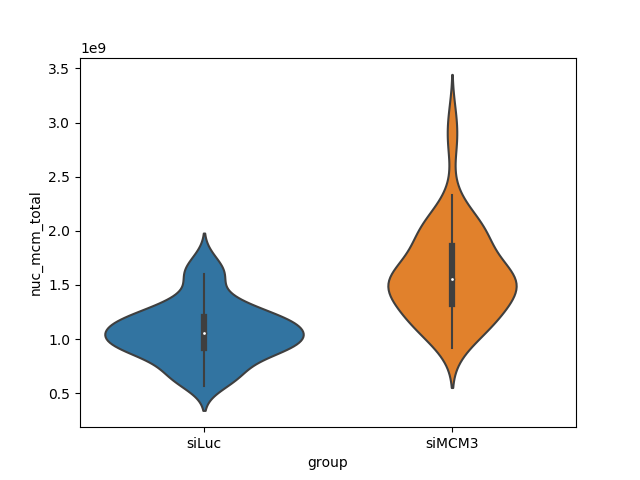

In [9]:
%matplotlib notebook
sn.violinplot(x='group',y='nuc_mcm_total',data=data)

<IPython.core.display.Javascript object>


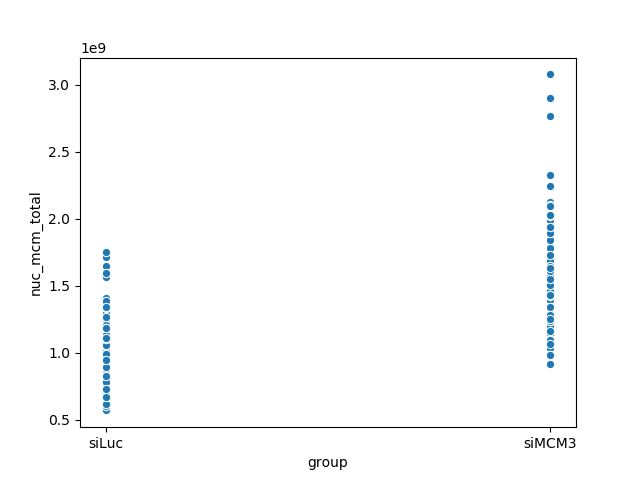

In [11]:
%matplotlib notebook
sn.scatterplot(x='group',y='nuc_mcm_total', data=data)

<IPython.core.display.Javascript object>


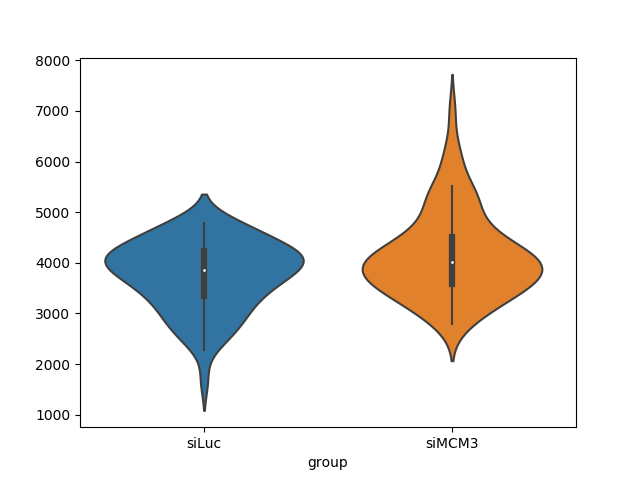

In [14]:
# normalizes the mcm signal to the volume 
%matplotlib notebook
sn.violinplot(x='group',y=data.nuc_mcm_total/data.nuc_vol_total,data=data)

## mean of nuc_mcm_total for two different groups

In [15]:
Luc.nuc_mcm_total.mean()

1069977237.5675676

In [16]:
MCM3.nuc_mcm_total.mean()

1609617146.6388888

In [17]:
Luc.nuc_mcm_total.mean()>MCM3.nuc_mcm_total.mean()

False

## concern on the result from the violin plot

From our meeting on 5/12, I learned that we are expected to see a higher mcm signal for siLuc group. 
However, the violin plot and the mean values of the mcm signals for these two groups show a difference from what we expected. <br>

# finding the top 5 cells that has the highest mcm signal in nucleus

Among earlyG1 cells for which we changed its molecular ages, we found a concerning pattern where these earlyG1 cells have too high mcm signals for entire nucleus. We decided to take a look into these cells. 

<br>

First, I took a look into the top 5 cells with highest mcm signals. 

In [18]:
Luc.loc[(Luc.category=='earlyG1'),('nuc_mcm_total')].sort_values(ascending=False).head()

27    1411068522
28    1351563536
34    1250490129
37    1154350783
50    1126429587
Name: nuc_mcm_total, dtype: int64

I tried another sorting that will show the top 8 cells - these cells basically have mcm signal of higher than 1e9. 

In [19]:
Luc.loc[(Luc.category=='earlyG1'),('nuc_mcm_total')].sort_values(ascending=False).head(n=8)

27    1411068522
28    1351563536
34    1250490129
37    1154350783
50    1126429587
25    1085030632
35    1033600612
52    1026154206
Name: nuc_mcm_total, dtype: int64

but since the top 5 cells have mcm signals higher than 1.1e9, I will look into what is happening. 

## *images for these 5 cells*

In [20]:
top5=(Luc.loc[((Luc.category=='earlyG1')&(Luc.nuc_mcm_total>1.1*(10^9))),:]).sort_values(by='nuc_mcm_total',ascending=False).head()

## #1. 

In [36]:
file1=top5.iloc[0]['file'].replace('ciz','tif')
fileDir=f'{bigDir}\data_tiff\\{file1}'
img1=imread(fileDir)
print(img1.shape) # channel 1 = mcm // channel 2 = hp1beta // channel 3 = dapi

maskfile=file1.replace('.tif','_nucleus.tif')
maskDir=f'{bigDir}\segmentation_nucleus_Otsu\\{maskfile}'
mask1=imread(maskDir)
print(mask1.shape)
print(maskDir)

(22, 3, 380, 380)
(22, 380, 380)
Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200207_new data\segmentation_nucleus_Otsu\20200203_cell_27_nucleus.tif


<IPython.core.display.Javascript object>


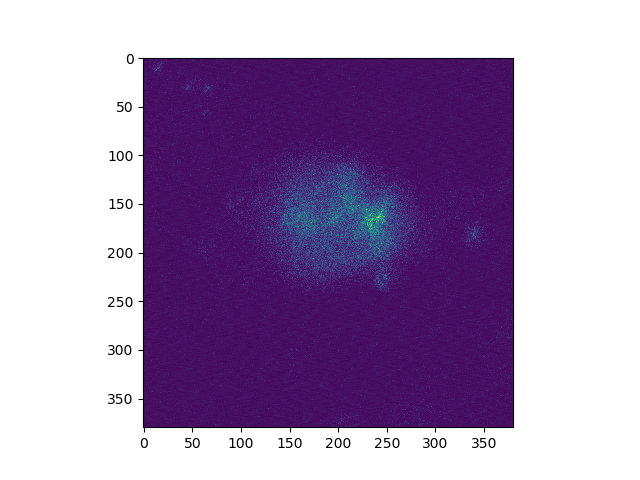

In [35]:
%matplotlib notebook
plt.imshow(img1[15,0,:,:])

<IPython.core.display.Javascript object>


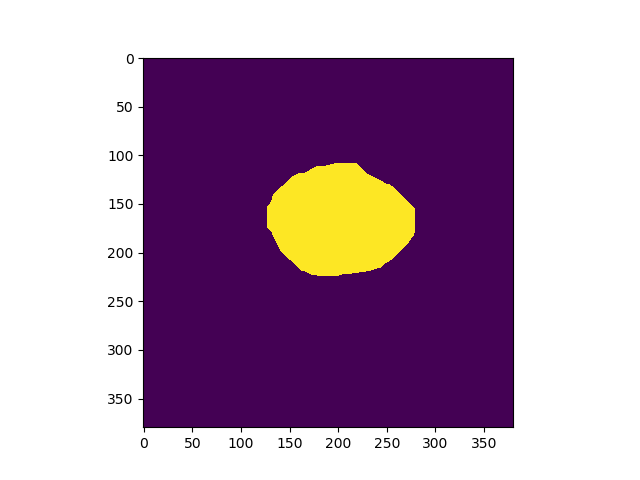

In [43]:
%matplotlib notebook
plt.imshow(mask1[15])

## #2. 

In [44]:
file1=top5.iloc[1]['file'].replace('ciz','tif')
fileDir=f'{bigDir}\data_tiff\\{file1}'
img1=imread(fileDir)
print(img1.shape) # channel 1 = mcm // channel 2 = hp1beta // channel 3 = dapi

maskfile=file1.replace('.tif','_nucleus.tif')
maskDir=f'{bigDir}\segmentation_nucleus_Otsu\\{maskfile}'
mask1=imread(maskDir)
print(mask1.shape)
print(maskDir)

(22, 3, 380, 380)
(22, 380, 380)
Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200207_new data\segmentation_nucleus_Otsu\20200203_cell_28_nucleus.tif


<IPython.core.display.Javascript object>


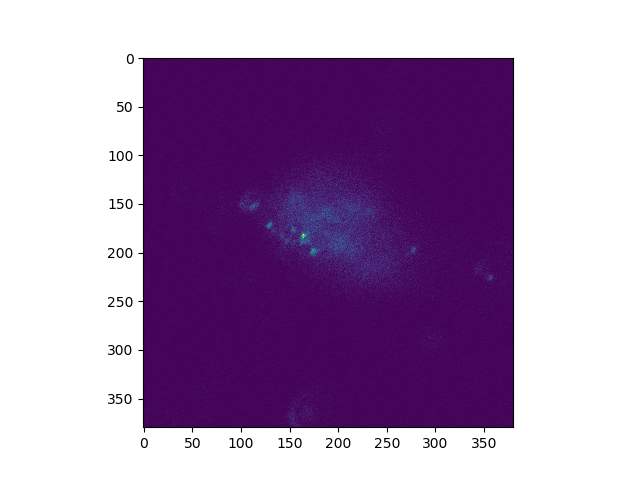

In [45]:
%matplotlib notebook
plt.imshow(img1[15,0,:,:])

<IPython.core.display.Javascript object>


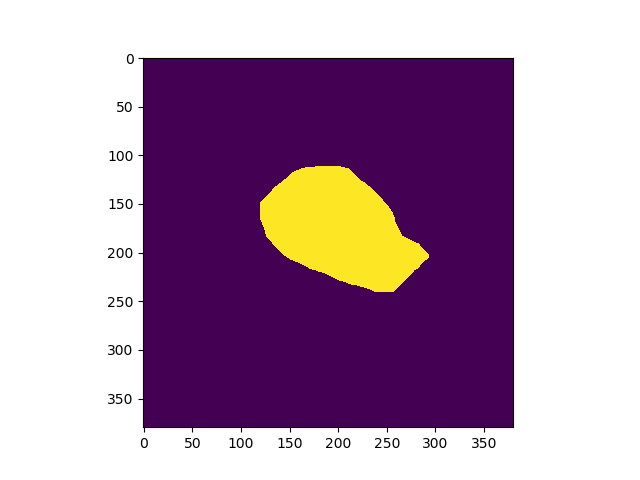

In [46]:
%matplotlib notebook
plt.imshow(mask1[15])

## #3. 

In [47]:
file1=top5.iloc[2]['file'].replace('ciz','tif')
fileDir=f'{bigDir}\data_tiff\\{file1}'
img1=imread(fileDir)
print(img1.shape) # channel 1 = mcm // channel 2 = hp1beta // channel 3 = dapi

maskfile=file1.replace('.tif','_nucleus.tif')
maskDir=f'{bigDir}\segmentation_nucleus_Otsu\\{maskfile}'
mask1=imread(maskDir)
print(mask1.shape)
print(maskDir)

(20, 3, 380, 380)
(20, 380, 380)
Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200207_new data\segmentation_nucleus_Otsu\20200203_cell_34_nucleus.tif


<IPython.core.display.Javascript object>


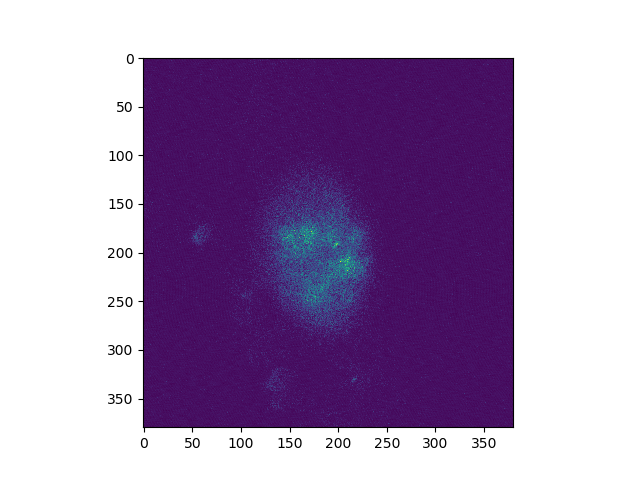

In [48]:
%matplotlib notebook
plt.imshow(img1[15,0,:,:])

<IPython.core.display.Javascript object>


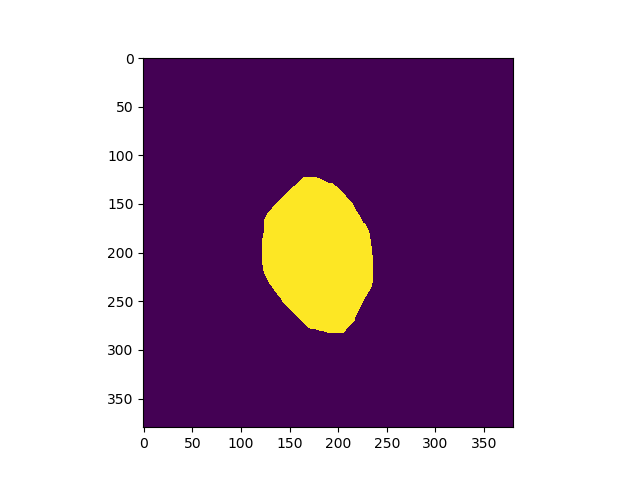

In [49]:
%matplotlib notebook
plt.imshow(mask1[15])

## #4. 

In [50]:
file1=top5.iloc[3]['file'].replace('ciz','tif')
fileDir=f'{bigDir}\data_tiff\\{file1}'
img1=imread(fileDir)
print(img1.shape) # channel 1 = mcm // channel 2 = hp1beta // channel 3 = dapi

maskfile=file1.replace('.tif','_nucleus.tif')
maskDir=f'{bigDir}\segmentation_nucleus_Otsu\\{maskfile}'
mask1=imread(maskDir)
print(mask1.shape)
print(maskDir)

(22, 3, 380, 380)
(22, 380, 380)
Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200207_new data\segmentation_nucleus_Otsu\20200203_cell_37_nucleus.tif


<IPython.core.display.Javascript object>


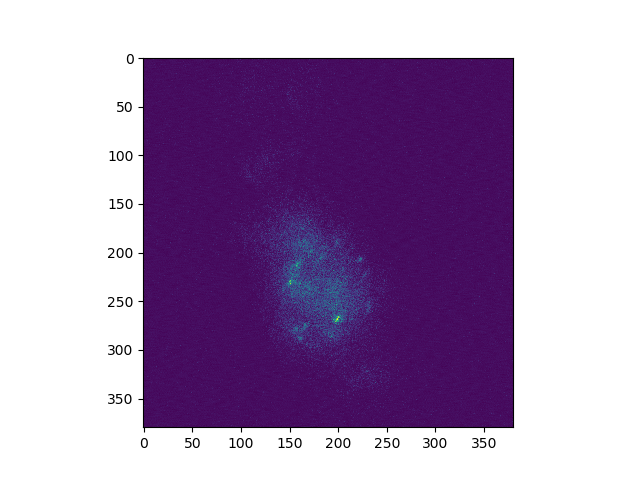

In [51]:
%matplotlib notebook
plt.imshow(img1[15,0,:,:])

<IPython.core.display.Javascript object>


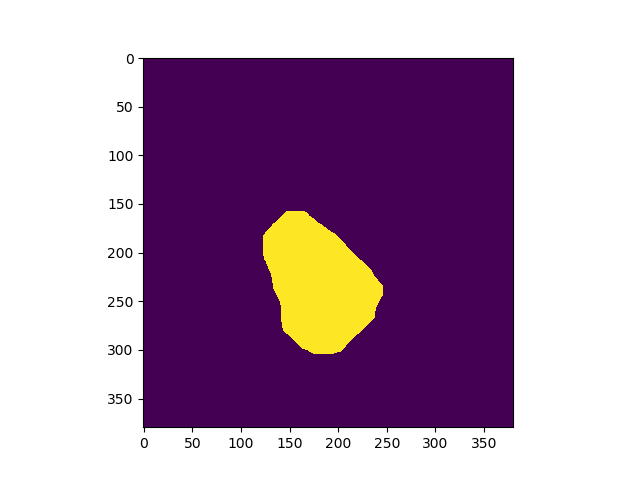

In [52]:
%matplotlib notebook
plt.imshow(mask1[15])

## #5. 

In [53]:
file1=top5.iloc[4]['file'].replace('ciz','tif')
fileDir=f'{bigDir}\data_tiff\\{file1}'
img1=imread(fileDir)
print(img1.shape) # channel 1 = mcm // channel 2 = hp1beta // channel 3 = dapi

maskfile=file1.replace('.tif','_nucleus.tif')
maskDir=f'{bigDir}\segmentation_nucleus_Otsu\\{maskfile}'
mask1=imread(maskDir)
print(mask1.shape)
print(maskDir)

(23, 3, 380, 380)
(23, 380, 380)
Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200207_new data\segmentation_nucleus_Otsu\20200203_cell_50_nucleus.tif


<IPython.core.display.Javascript object>


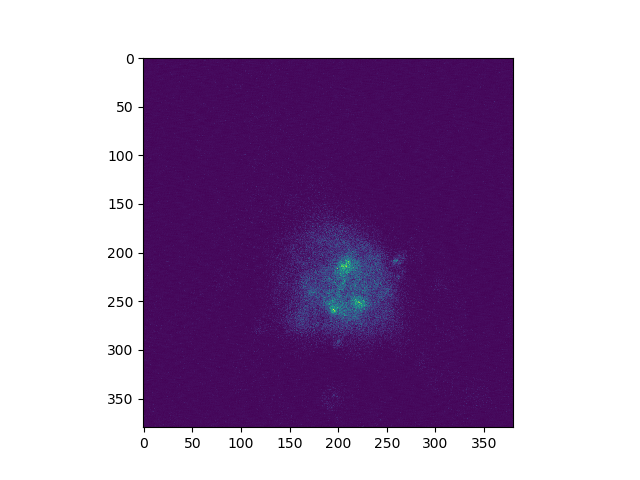

In [54]:
%matplotlib notebook
plt.imshow(img1[15,0,:,:])

<IPython.core.display.Javascript object>


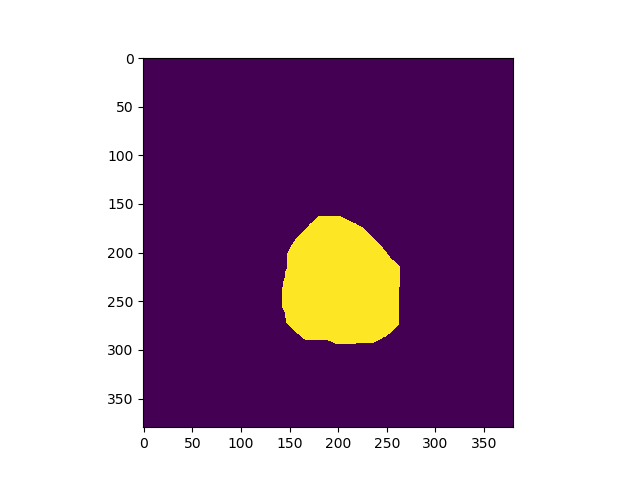

In [55]:
%matplotlib notebook
plt.imshow(mask1[15])

## thoughts

From the actual cell images and nucleus masks, these cells (with high mcm signals) do not seem to have any problems with segmentations. The mask does not include any concerning backgrounds - although it can raise a concern for covering too much area. However, from my perspective, the segmentations do not seem to be the primary factor for the cell's high mcm signals.